In [1]:
from tensorflow import keras
from tensorflow.keras import regularizers
from tensorflow.keras import layers
from tensorflow.keras import models
from tensorflow.keras import optimizers
import numpy as np
import math
import matplotlib.pyplot as plt

In [2]:
# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()
y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)

In [3]:
print(x_train.shape, x_test.shape)
print(y_train[0])

(60000, 28, 28) (10000, 28, 28)
[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [4]:
# Dimension:4 [the number of samples, rows, columns, RGB]
x_train = np.expand_dims(x_train, axis=-1)
x_test = np.expand_dims(x_test, axis=-1)
print(x_train.shape, x_test.shape)

(60000, 28, 28, 1) (10000, 28, 28, 1)


In [5]:
# split trainind data to training and validation
num_val = 5000
indice = np.arange(x_train.shape[0])
np.random.shuffle(indice)
x_train = x_train[indice]/255
y_train = y_train[indice]
partial_train_x = x_train[:-num_val]
x_val = x_train[-num_val:]
partial_train_y = y_train[:-num_val]
y_val = y_train[-num_val:]
print(partial_train_x.shape,partial_train_y.shape)
print(x_val.shape,y_val.shape)

(55000, 28, 28, 1) (55000, 10)
(5000, 28, 28, 1) (5000, 10)


In [6]:
def build_model():
    model = models.Sequential()
    model.add(layers.Conv2D(16, (3, 3), activation='relu',input_shape=(28, 28, 1)))
    model.add(layers.MaxPooling2D((2, 2)))
    
    model.add(layers.Conv2D(32, (3, 3), activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))
    
    model.add(layers.Flatten())
    model.add(layers.Dropout(0.5))
    model.add(layers.Dense(64))
    model.add(layers.Dense(10,activation='softmax'))

    model.compile(loss='categorical_crossentropy',
           optimizer=optimizers.RMSprop(learning_rate=1e-4),
           metrics=['acc'])
    return model

In [7]:
model = build_model()
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 16)        160       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 32)          0         
_________________________________________________________________
flatten (Flatten)            (None, 800)               0         
_________________________________________________________________
dropout (Dropout)            (None, 800)               0         
_________________________________________________________________
dense (Dense)                (None, 64)                5

In [8]:
# start training
history = model.fit(
      partial_train_x,partial_train_y,
      epochs=22,
      batch_size=32,
      validation_data=(x_val,y_val),
      #verbose = 0
      )

Epoch 1/22
1719/1719 [==============================] - 17s 10ms/step - loss: 0.7726 - acc: 0.7640 - val_loss: 0.2430 - val_acc: 0.9322
Epoch 2/22
1719/1719 [==============================] - 16s 10ms/step - loss: 0.2521 - acc: 0.9249 - val_loss: 0.1469 - val_acc: 0.9572
Epoch 3/22
1719/1719 [==============================] - 17s 10ms/step - loss: 0.1817 - acc: 0.9451 - val_loss: 0.1161 - val_acc: 0.9652
Epoch 4/22
1719/1719 [==============================] - 18s 10ms/step - loss: 0.1518 - acc: 0.9548 - val_loss: 0.0971 - val_acc: 0.9676
Epoch 5/22
1719/1719 [==============================] - 18s 10ms/step - loss: 0.1348 - acc: 0.9595 - val_loss: 0.0876 - val_acc: 0.9710
Epoch 6/22
1719/1719 [==============================] - 17s 10ms/step - loss: 0.1233 - acc: 0.9634 - val_loss: 0.0810 - val_acc: 0.9748
Epoch 7/22
1719/1719 [==============================] - 17s 10ms/step - loss: 0.1150 - acc: 0.9653 - val_loss: 0.0745 - val_acc: 0.9750
Epoch 8/22
1719/1719 [==========================

In [9]:
# start testing
performance = model.evaluate(x_test, y_test, verbose=0)
print("Test loss:", performance[0])
print("Test accuracy:", performance[1])

Test loss: 10.460089683532715
Test accuracy: 0.9828000068664551


In [10]:
# record correct and incorrect data
correct = {}
incorrect = {}
for i,predict in enumerate(model.predict(x_test)):
    if np.sum(abs(predict - y_test[i])) == 0:
        correct[i] = np.argmax(predict)
    else:
        incorrect[i] = np.argmax(predict)

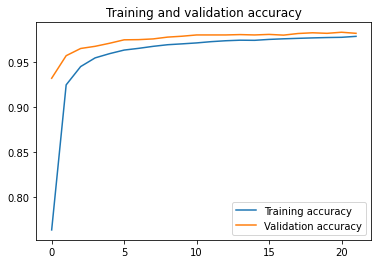

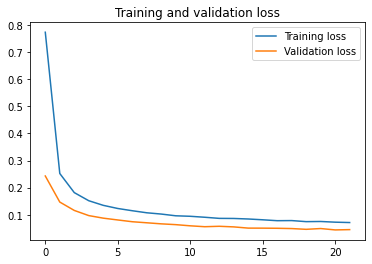

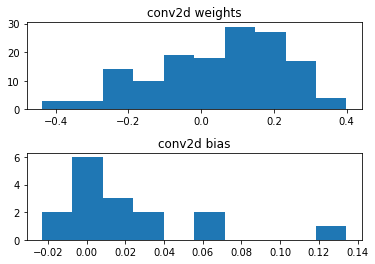

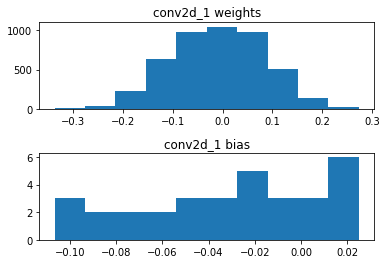

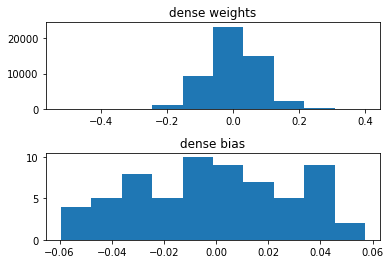

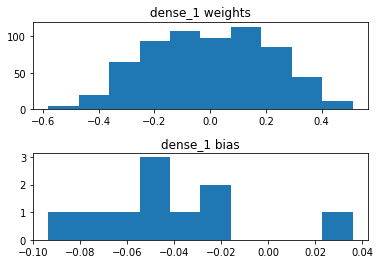

In [11]:
# plot the training curve and layer's weight
model.save('original.h5')
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

def plot_training(train_loss,val_loss,title,metrix):
    epochs = range(len(train_loss))
    plt.plot(epochs, train_loss, '-', label='Training '+metrix)
    plt.plot(epochs, val_loss, '-', label='Validation '+metrix)
    plt.title(title)
    plt.legend()
    plt.show()

def plot_weight(model):
    for layer in model.layers:
        plt.subplots_adjust(hspace=0.5)
        if len(layer.get_weights()) == 0:
            continue
        plt.subplot(211)
        plt.hist(layer.get_weights()[0].flatten())
        plt.title(layer.name+' weights')

        plt.subplot(212)
        plt.hist(layer.get_weights()[1].flatten())
        plt.title(layer.name+' bias')
        plt.show()
        plt.close()
        
plot_training(acc,val_acc,'Training and validation accuracy', 'accuracy')
plot_training(loss,val_loss,'Training and validation loss', 'loss')
plot_weight(model)

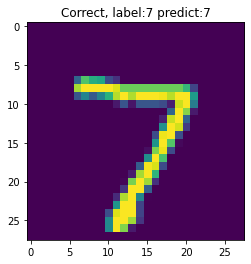

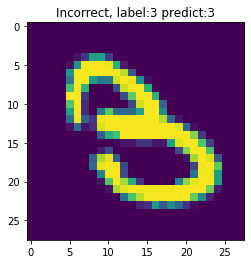

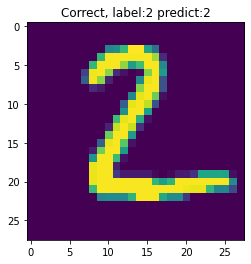

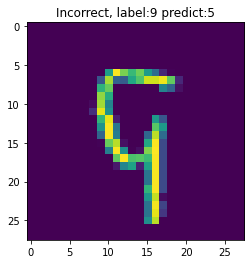

In [12]:
# show the instances of correct and incorrect answers
model = keras.models.load_model('original.h5') 

for i in range(2):
    c_id = list(correct.keys())[i]
    ic_id = list(incorrect.keys())[i]
    plt.imshow(x_test[c_id])
    plt.title('Correct, label:'+ str(np.argmax(y_test[c_id]))+ ' predict:'+ str(correct[c_id]))
    plt.show()
    plt.close()
    
    plt.imshow(x_test[ic_id])
    plt.title('Incorrect, label:'+ str(np.argmax(y_test[ic_id]))+ ' predict:'+ str(incorrect[ic_id]))
    plt.show()
    plt.close()

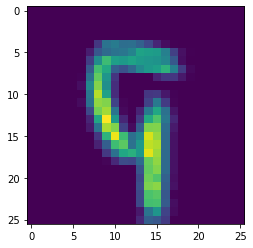

In [13]:
# show one of the conv2d layer's output

# Extracts the outputs of the top 4 layers [conv2d -> max_pooling2d_1]:
layer_outputs = [layer.output for layer in model.layers[:4]]
# Creates a model that will return these outputs, given the model input:
activation_model = models.Model(inputs=model.input, outputs=layer_outputs)
# Take incorrect photo 6 for example
img_tensor = np.expand_dims(x_test[list(incorrect.keys())[1]],axis = 0)
activations = activation_model.predict(img_tensor)
layer_1_activations = activations[0]
# feature map has shape [1, row, columns, features]
plt.imshow(layer_1_activations[0,:,:,5])

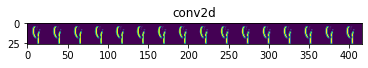

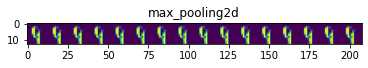

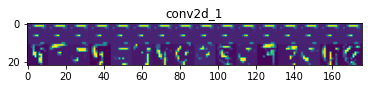

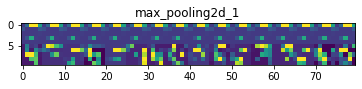

In [14]:
# show all of the layer's output

layer_names = []
for layer in model.layers[:4]:
    layer_names.append(layer.name)

n_cols = 16
for layer_name, layer_activation in zip(layer_names, activations):
    n_rows = math.floor(layer_activation.shape[-1]/n_cols)
    size = layer_activation.shape[1] # photo shape: size*size
    display_grid = np.zeros((size*n_rows, size*n_cols))
    for col in range(n_cols):
        for row in range(n_rows):
            channel_img = layer_activation[0,:,:,col*row+row]
            
            # Post-process the feature to make it visually palatable
            channel_img -= channel_img.mean()
            channel_img /= channel_img.std()
            channel_img *= 64
            channel_img += 128
            channel_img = np.clip(channel_img, 0, 255).astype('uint8')
            
            display_grid[size*row:size*(row+1),size*col:size*(col+1)] = channel_img
        
    plt.imshow(display_grid)
    plt.title(layer_name)
    plt.show()
    plt.close()

In [17]:
# build the l2 regularization model with factors 0.01
def build_regular_model():
    model = models.Sequential()
    model.add(layers.Conv2D(16, (3, 3), activation='relu',input_shape=(28, 28, 1),\
                           kernel_regularizer=regularizers.l2(0.01)))
    model.add(layers.MaxPooling2D((2, 2)))
    
    model.add(layers.Conv2D(32, (3, 3), activation='relu',\
                            kernel_regularizer=regularizers.l2(0.01)))
    model.add(layers.MaxPooling2D((2, 2)))
    
    model.add(layers.Flatten())
    model.add(layers.Dropout(0.5))
    model.add(layers.Dense(64, kernel_regularizer=regularizers.l2(0.01)))
    model.add(layers.Dense(10,activation='softmax'))

    model.compile(loss='categorical_crossentropy',
           optimizer=optimizers.RMSprop(learning_rate=1e-4),
           metrics=['acc'])
    return model

In [18]:
regular_model = build_regular_model()
history = regular_model.fit(
      partial_train_x,partial_train_y,
      epochs=25,
      batch_size=32,
      validation_data=(x_val,y_val),
      #verbose = 0
      )

Epoch 1/25
1719/1719 [==============================] - 21s 12ms/step - loss: 1.6678 - acc: 0.7654 - val_loss: 0.8918 - val_acc: 0.9304
Epoch 2/25
1719/1719 [==============================] - 20s 12ms/step - loss: 0.7769 - acc: 0.9151 - val_loss: 0.5627 - val_acc: 0.9522
Epoch 3/25
1719/1719 [==============================] - 21s 12ms/step - loss: 0.5491 - acc: 0.9355 - val_loss: 0.4343 - val_acc: 0.9560
Epoch 4/25
1719/1719 [==============================] - 21s 12ms/step - loss: 0.4497 - acc: 0.9415 - val_loss: 0.3646 - val_acc: 0.9590
Epoch 5/25
1719/1719 [==============================] - 23s 13ms/step - loss: 0.3989 - acc: 0.9445 - val_loss: 0.3296 - val_acc: 0.9638
Epoch 6/25
1719/1719 [==============================] - 22s 13ms/step - loss: 0.3687 - acc: 0.9465 - val_loss: 0.3103 - val_acc: 0.9618
Epoch 7/25
1719/1719 [==============================] - 22s 13ms/step - loss: 0.3503 - acc: 0.9482 - val_loss: 0.2964 - val_acc: 0.9640
Epoch 8/25
1719/1719 [==========================

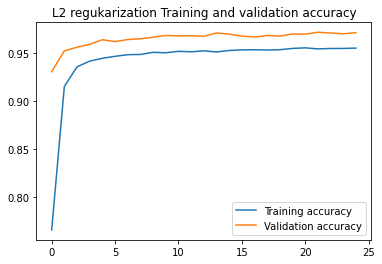

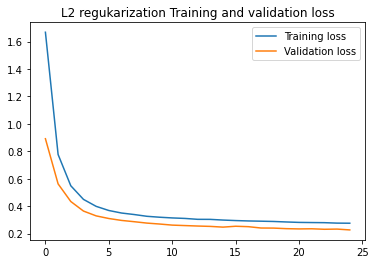

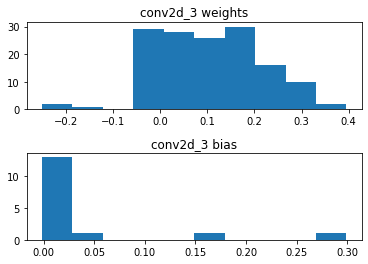

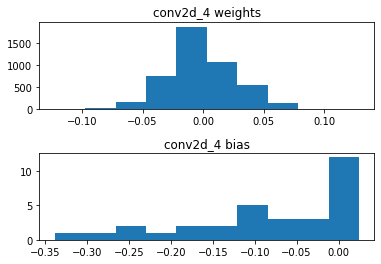

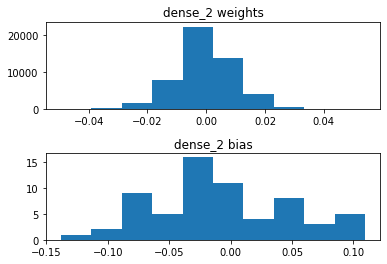

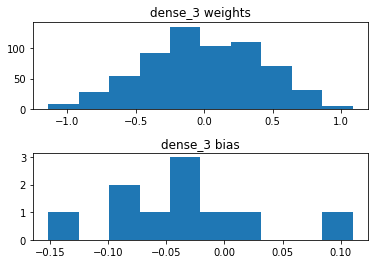

In [19]:
regular_model.save('l2_regularization.h5')
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
plot_training(acc,val_acc,'L2 regukarization Training and validation accuracy', 'accuracy')
plot_training(loss,val_loss,'L2 regukarization Training and validation loss', 'loss')
plot_weight(regular_model)

In [20]:
# start testing
performance = regular_model.evaluate(x_test, y_test, verbose=0)
print("Test loss:", performance[0])
print("Test accuracy:", performance[1])

Test loss: 13.893243789672852
Test accuracy: 0.9667999744415283
